## Step 1: Business Problem
Create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researches classify penguins in the field, instead of needing an experienced biologist. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [78]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Step 2: Data Understanding. 
- penguins_size.csv: Simplified data from original penguin data sets.
- - Species: Penguin species(adelie, chinstrap or gentoo)
  - Culmen_length_mm: Culmen length(mm)
  - culmen_depth_mm: culmen depth(mm)
  - flipper_length_mm: flipper length(mm)
  - body_mass_f: body mass (g)
  - island: island name(dream, Torgersen,or biscoe)
  - sex: penguin sex.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Step 3: Data Preprocessing
### 3.1: EDA

In [80]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

- From above its clear its multiclass classification problem (more than two categories in the out put veriables). 

In [81]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [82]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [83]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

- We have "." as one catogery in sex column, its clear that its wrong value. I am choosing to drop that one record.
- Since its less than 1 percent we can ignore and drop. 

In [84]:
df = df[df["sex"]!="."]
df.shape

(343, 7)

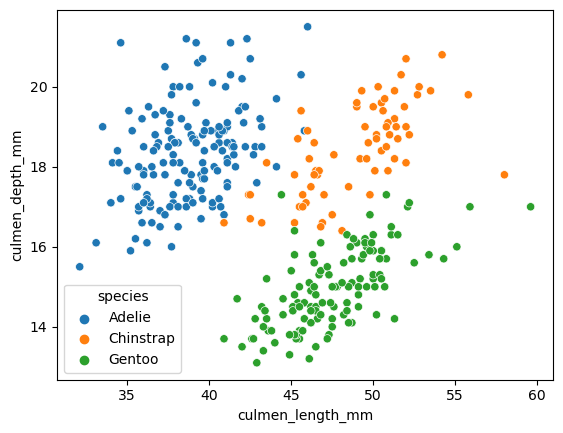

In [85]:
sns.scatterplot(x="culmen_length_mm",y="culmen_depth_mm",data=df,hue="species")
plt.show()

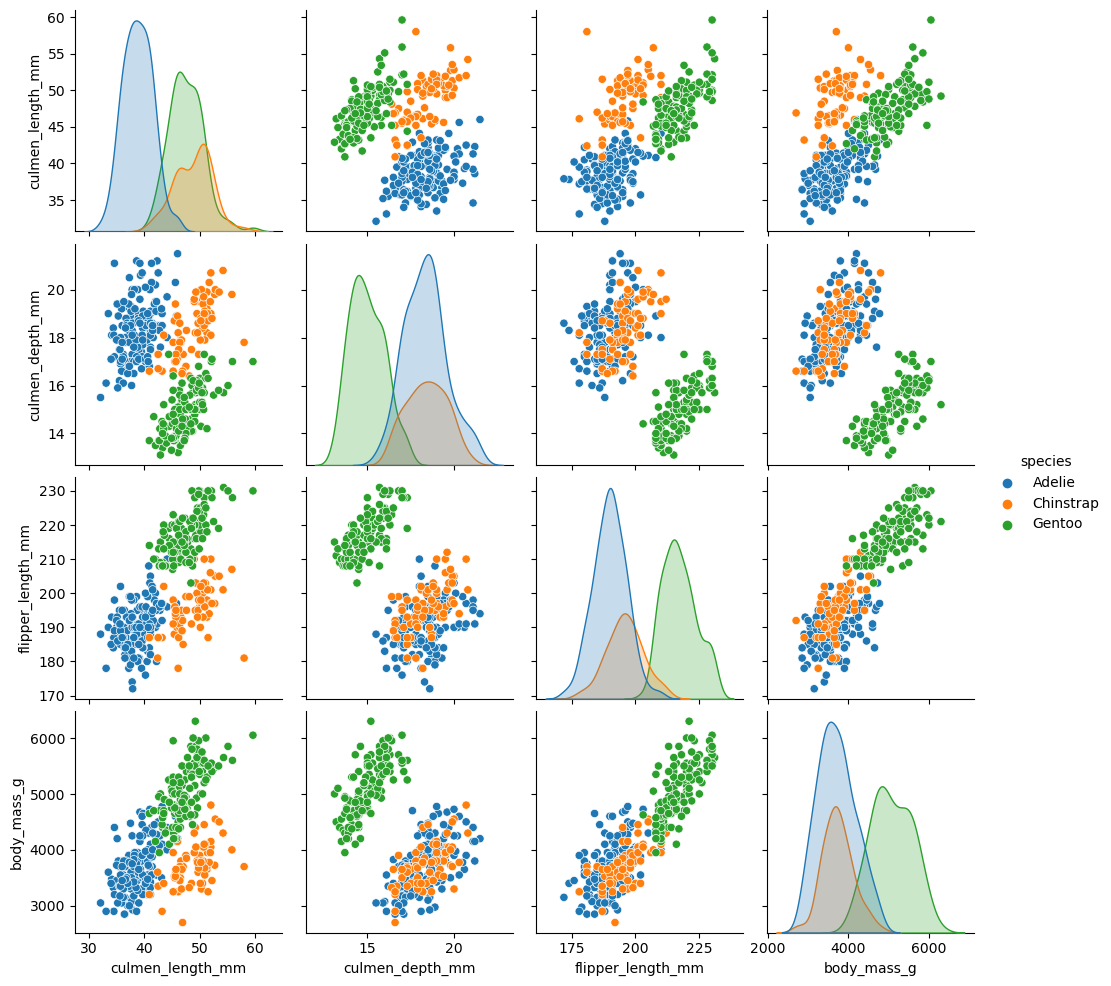

In [55]:
sns.pairplot(df,hue="species")
plt.show()

### 3.2: Data Cleaning. 

In [86]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [87]:
df = df.dropna()
df.shape

(333, 7)

- I am not treating outliers in this model. I will do it in next itration of the project.

### 3.3 Encoding. 

In [88]:
df1 = df.drop("species",axis=1)
df1

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [89]:
X = pd.get_dummies(df1,drop_first=True)   #converting island and sex (catagroical data)

In [90]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [91]:
y = df["species"]

### 3.4: Train / Test Split

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

## Step 4: Modelling (Base Line Model)

In [94]:
# Random Forest Classification - with Default Hyperparameters
from sklearn.ensemble import RandomForestClassifier
dt_default = RandomForestClassifier()
dt_default.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
# Prediction
base_pred_train = dt_default.predict(X_train)
base_pred_test = dt_default.predict(X_test)

## Step 5: Evaluation

In [96]:
#1 Train & Test Accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy:", accuracy_score(pred_train,y_train))
print("Test accuracy:", accuracy_score(base_pred,y_test))

#2 cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_default,X,y,cv=5)
print("Cross Validation Score:", scores.mean())

Train accuracy: 1.0
Test accuracy: 0.9402985074626866
Cross Validation Score: 0.9909995477159657


The above model base line model is giving good results. But to make it more better, lets do hyperparameter tuning. 
# -----------------------------------

## Step 6: Find Important Features. (Feature Selection - Embadded )

In [97]:
### Fine the Importance of each featur
# Method 1::
df_default.feature_importances_

array([0.35578062, 0.01037472, 0.54553612, 0.        , 0.08830855,
       0.        , 0.        ])

In [1]:
#Method 2::
pd.DataFrame(index=X.columns,data=dt_default.feature_importances_,columns=["Feature Importancee"])

NameError: name 'pd' is not defined

- Above its clear that island_Torgersen,sex_MALE,body_mass_g,culmen_depth_mm as no impact on model.

## Step 7: Hyperparameter Tuning.

In [99]:
from sklearn.model_selection import GridSearchCV

#model
estimator = RandomForestClassifier(random_state=0)

#parameters (which you want to tune and identify the best)
param_grid = {"n_estimators":list(range(1,101))}

grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

{'n_estimators': 7}

## Step 8: Final RandomForest Model

#### with best hyperparamets 

In [100]:
final_model = RandomForestClassifier(n_estimators=7, random_state =0)
final_model.fit(X_train,y_train)

final_pred_train = final_model.predict(X_train)
final_pred_test = final_model.predict(X_test)

print("Final Model Train accuracy:", accuracy_score(final_pred_train,y_train))
print("Final Model Test accuracy:", accuracy_score(final_pred_test,y_test))

scores = cross_val_score(dt_final,X,y,cv=5)
print("Cross Validation Score:", scores.mean())

Final Model Train accuracy: 1.0
Final Model Test accuracy: 0.9701492537313433
Cross Validation Score: 0.9789235639981909
